This notebook reads in bus data and does a rolling averages time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style


Read in cleaned data

In [3]:
# first, read in the cleaned data for buses with increased service

def read_bus_data(csv_file):
    bus_data = pd.DataFrame()
    bus = pd.read_csv(csv_file)
    
    #make sure the bus lines are strings in the dataframe
    #otherwise there is an issue with plotting
    bus['BUS'] = bus['BUS'].astype(str).str.strip()

    #sort the dataframe by bus and by date
    bus_sorted = bus.sort_values(by=['BUS', 'DATE']).reset_index(drop=True)
    
    return bus_sorted

bus = read_bus_data("CTA_Average_Bus_Ridership_1999_2024_inceased_service.csv")

In [4]:
bus.head()

,BUS,YEAR,MONTH,Weekday,Saturday,Sunday - Holiday,Sum,DATE
0,146,1999,1,8266.0,4088.0,2938.0,15292,1999-01-01
1,146,1999,2,9094.0,5440.0,3585.0,18119,1999-02-01
2,146,1999,3,9649.0,5394.0,3957.0,19000,1999-03-01
3,146,1999,4,9804.0,5946.0,3854.0,19604,1999-04-01
4,146,1999,5,9682.0,5564.0,4442.0,19688,1999-05-01


Also read in list of buses with increased service

In [5]:
# also read in the list of buses with increased service

bus_lines = []
with open('bus_lines_increased_service.txt','r') as file:
    for line in file:
        cleaned_lines = line.rstrip()
        bus_lines.append(cleaned_lines)

print(bus_lines)

['21', '22', '62', '77', '97', '94', '146', '152', '34', '47', '54', '60', '63', '79']


In [6]:
"""
This function takes in a single bus route as a string, retricts the bus
dataframe to this one route. If only the bus route is given,
the function will plot the Weekday, Saturday, and Sunday-Holiday ridership
averages. If a second False argument is given, the function will return
the restricted dataframe.
"""

def plot_bus_routes(bus_route, plot=True, save = True):
    #first, make a list with the bus line string
    bus_route_list = [bus_route]
    
    #then restrict the dataframe to only that bus line
    bus_route_df = bus[bus['BUS'].isin(bus_route_list)]

    #
    if plot:
        plot_title = "The " + bus_route + "line"
        fig_title = "The"+bus_route+" bus.png"
        ax = bus_route_df.plot(x='DATE',y=['Weekday','Saturday','Sunday - Holiday','Sum'], kind='line',title=plot_title)
        fig = ax.get_figure()
        if save:
            fig.savefig(fig_title)
    else:
        return bus_route_df

In [7]:
"""
This function takes a single bus route and a single year
and plots the average ridership for that year

"""

def plot_single_year(bus_route,year, plot = True):
    bus_route_df = plot_bus_routes(bus_route, False)
    bus_route_year = bus_route_df[bus_route_df['YEAR'].isin([year])]

    if plot:
        plot_title = "The " + bus_route + " route for year " + str(year)
        fig_title = "The"+bus_route+" bus.png"
        ax = bus_route_year.plot(
            x='DATE',
            y=['Weekday','Saturday','Sunday - Holiday','Sum'], 
            kind='line',
            title=plot_title)
        
        ax.set_xlabel("Month")
        ax.set_ylabel("Ridership")
        
        #ax.set_xlabel(bus_route_df['MONTH'])
        fig = ax.get_figure()
    else:
        return bus_route_year



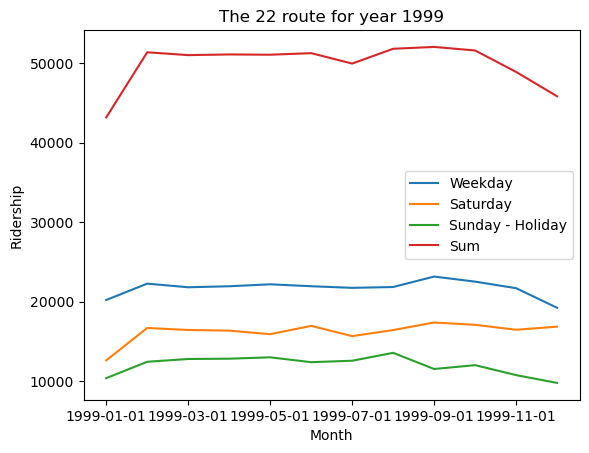

In [8]:
b146 = plot_single_year('22',1999)
b146

In [9]:
"""
This function takes a range of years (assume start_year and end_year are integers)
and plots the average ridership data for that range.
"""

def plot_range_of_years(bus_route,start_year,end_year, plot = True):
    years = [i for i in range(start_year,end_year+1)]
    
    bus_route_df = plot_bus_routes(bus_route, False)
    bus_route_year = bus_route_df[bus_route_df['YEAR'].isin(years)]

    if plot:
        plot_title = "The " + bus_route + " route for year " + str(start_year) + " to " + str(end_year)
        fig_title = "The"+bus_route+" bus.png"
        ax = bus_route_year.plot(
            x='DATE',
            y=['Weekday','Saturday','Sunday - Holiday','Sum'], 
            kind='line',
            title=plot_title)
        
        #ax.set_xlabel(bus_route_df['MONTH'])
        fig = ax.get_figure()
    else:
        return bus_route_year

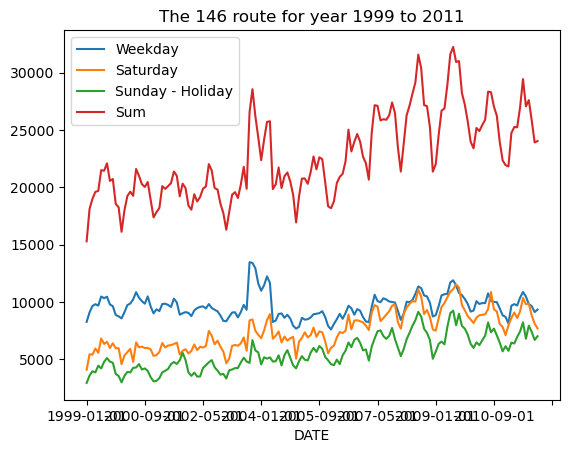

In [10]:
plot_range_of_years('146',1999,2011)

In [11]:
def plot_single_year_plt(bus_route,year):
    df = plot_bus_routes(bus_route, False)

    bus_route_df = bus[bus['YEAR'].isin([year])]

    plot_title = "The " + bus_route + " route for year " + str(year)
    fig_title = "The"+bus_route+" bus.png"

    # plt.plot(bus_route_df.MONTH, bus_route_df.Sum)
    # plt.show()

    print(len(bus_route_df.MONTH), len(bus_route_df.Sum))


In [12]:
# rolling averages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error

set_style("whitegrid")


Implement Rolling Averages

,Total_Average,Rolling_Average
0,15292,NaN
1,18119,NaN
2,19000,NaN
3,19604,NaN
4,19688,NaN
...,...,...
295,24664,9015.000000
296,25348,9020.416667
297,24138,9015.416667
298,21937,9033.583333


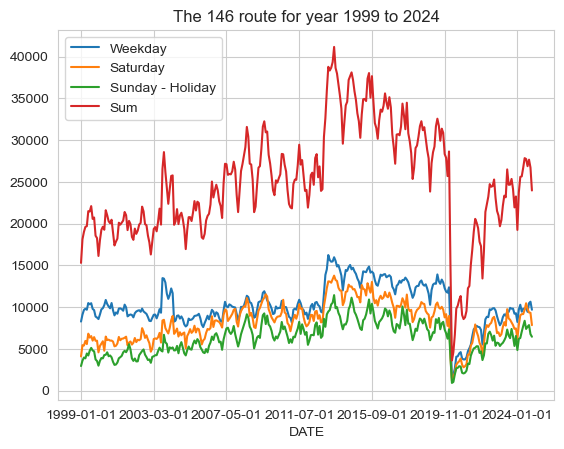

In [20]:
"""Note to self: maybe make this a function?"""

route = '146'

bus146 = plot_range_of_years(route,1999,2024)

bus_train = plot_range_of_years(route,1999,2023,False)
bus_test = plot_single_year(route,2024,False)

# Focus here on the weekday data

# pd.DataFrame({'Weekday_Average':bus_train.Weekday,
#               'Rolling_Average':bus_train.Weekday.rolling(12, 
#    closed = 'left').mean()})


#focus on all data
pd.DataFrame({'Total_Average':bus_train.Sum,
              'Rolling_Average':bus_train.Weekday.rolling(12, closed = 'left').mean()})
     


In [25]:
bus_train

,BUS,YEAR,MONTH,Weekday,Saturday,Sunday - Holiday,Sum,DATE,change
0,146,1999,1,8266.0,4088.0,2938.0,15292,1999-01-01,0.0
1,146,1999,2,9094.0,5440.0,3585.0,18119,1999-02-01,2827.0
2,146,1999,3,9649.0,5394.0,3957.0,19000,1999-03-01,881.0
3,146,1999,4,9804.0,5946.0,3854.0,19604,1999-04-01,604.0
4,146,1999,5,9682.0,5564.0,4442.0,19688,1999-05-01,84.0
...,...,...,...,...,...,...,...,...,...
295,146,2023,8,9907.0,8479.0,6278.0,24664,2023-08-01,17.0
296,146,2023,9,9810.0,8157.0,7381.0,25348,2023-09-01,684.0
297,146,2023,10,9816.0,7847.0,6475.0,24138,2023-10-01,-1210.0
298,146,2023,11,9200.0,7392.0,5345.0,21937,2023-11-01,-2201.0


We might also be interested in the difference, so this cell calculates the difference in ridership from the previous day. This eliminates seasonal trends

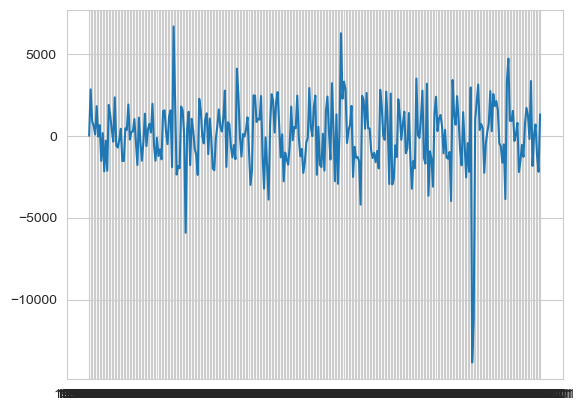

In [21]:
bus_train['change'] = bus_train['Sum'].diff()
bus_train.loc[0,'change']=0
bus_train[['change']]

#look at the difference
plt.plot(bus_train['DATE'],bus_train['change'])

229    2018-02-01
230    2018-03-01
231    2018-04-01
232    2018-05-01
233    2018-06-01
          ...    
295    2023-08-01
296    2023-09-01
297    2023-10-01
298    2023-11-01
299    2023-12-01
Name: DATE, Length: 71, dtype: object

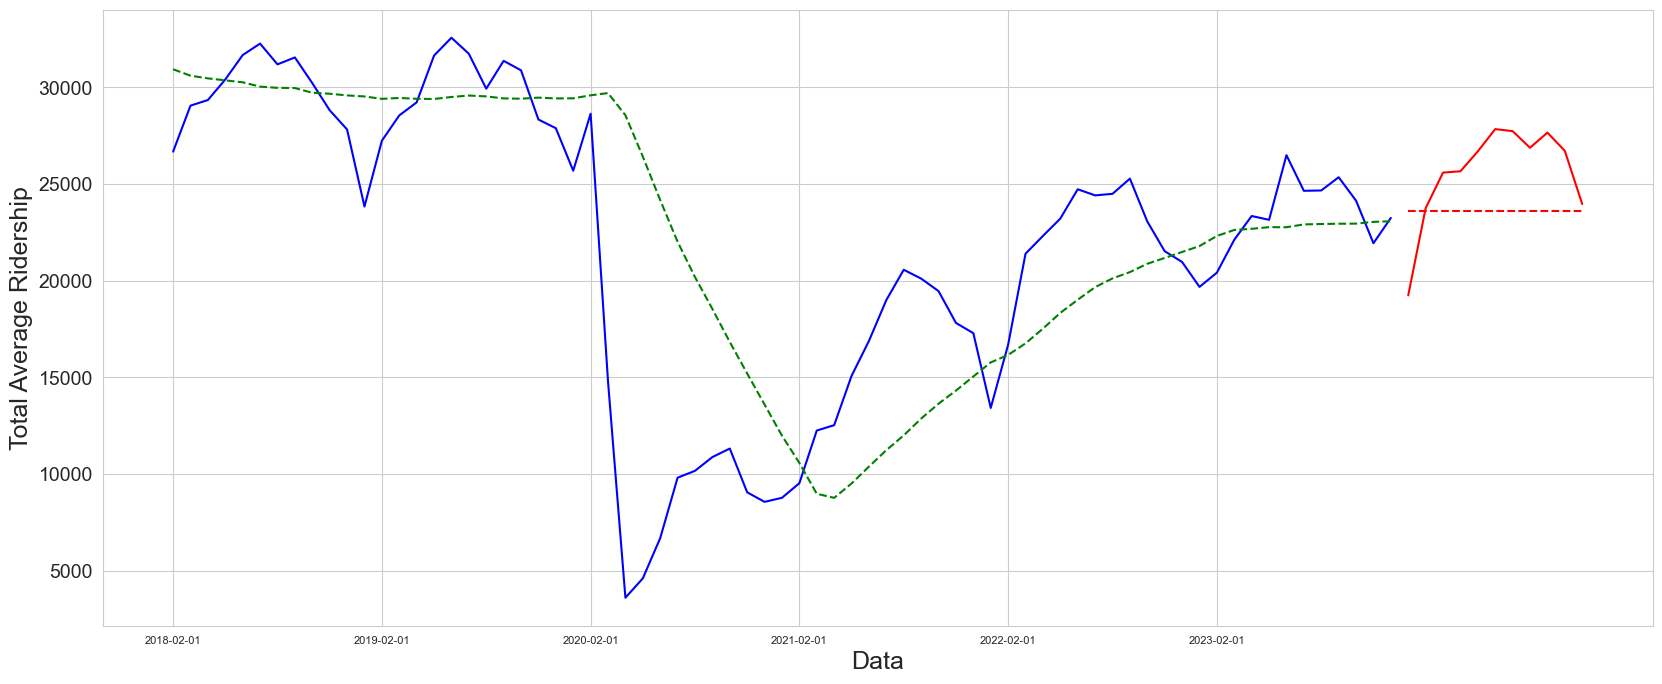

In [38]:
plt.figure(figsize=(20,8))

plt.plot(bus_train.DATE[-71:],
         bus_train.Sum[-71:],
         'b',
         label = "Training Data")


# plt.plot(bus_train.DATE[-71:],
#          bus_train.Sum[-71:].rolling(12,closed = 'left').mean(),
#          'g--',
#          label = "Training Rolling Average")

plt.plot(bus_train.DATE[-71:],
         bus_train.Sum.rolling(12,closed = 'left').mean()[-71:],
         'g--',
         label = "Training Rolling Average")

plt.plot(bus_test.DATE,
         bus_test.Sum[-11:],
         'r',
         label = "Test Data")

plt.plot(bus_test.DATE,
         bus_train.Sum[-11:].mean()*np.ones(11),
         'r--',
         label = "Rolling Average Prediction")

plt.xlabel("Data",fontsize=18)
plt.ylabel("Total Average Ridership",fontsize=18)

plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, len(bus_train[-71:]), 12)) # Set ticks every 12 units
plt.show()



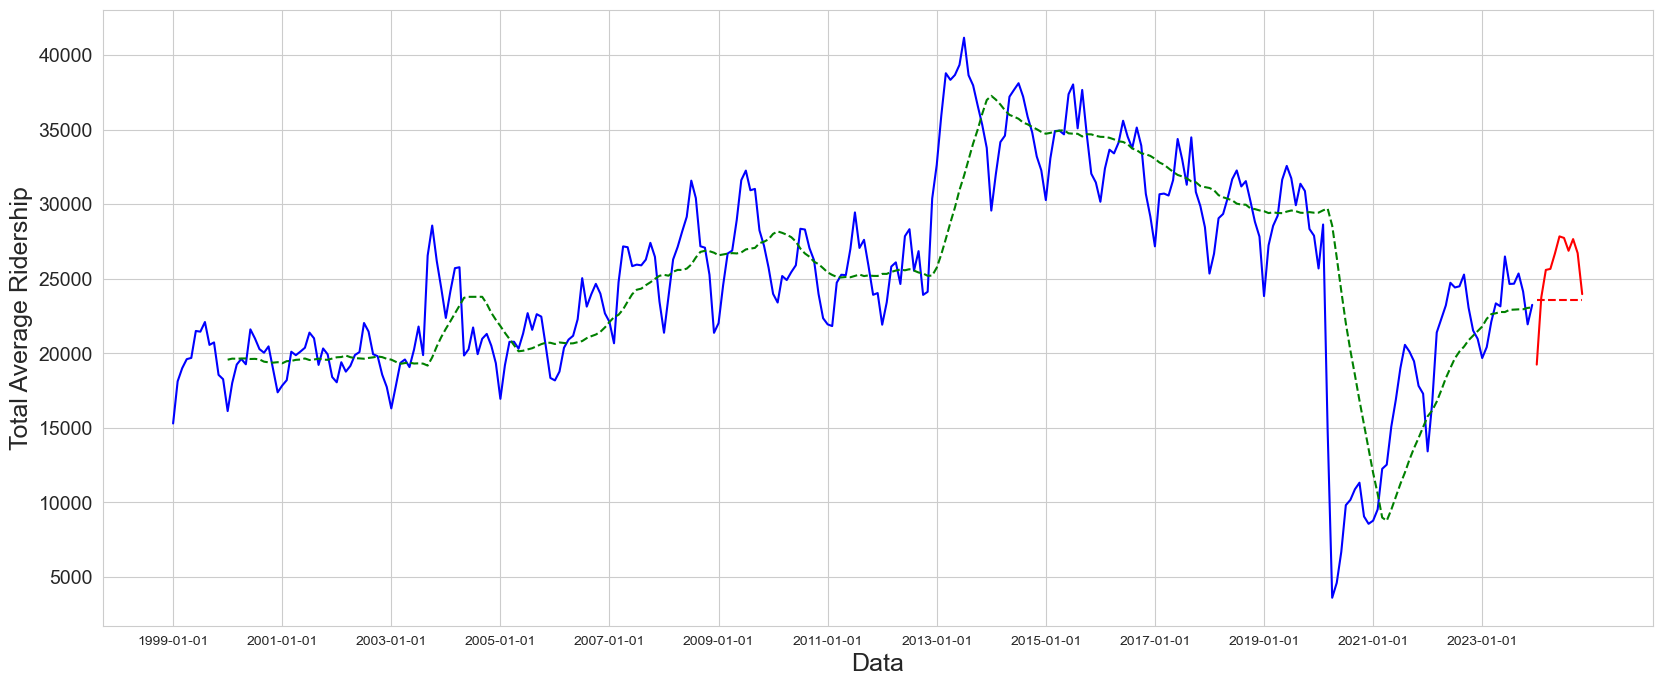

In [36]:
plt.figure(figsize=(20,8))

plt.plot(bus_train.DATE,
         bus_train.Sum,
         'b',
         label = "Training Data")


# plt.plot(bus_train.DATE[-71:],
#          bus_train.Sum[-71:].rolling(12,closed = 'left').mean(),
#          'g--',
#          label = "Training Rolling Average")

plt.plot(bus_train.DATE,
         bus_train.Sum.rolling(12,closed = 'left').mean(),
         'g--',
         label = "Training Rolling Average")

plt.plot(bus_test.DATE,
         bus_test.Sum[-11:],
         'r',
         label = "Test Data")

plt.plot(bus_test.DATE,
         bus_train.Sum[-11:].mean()*np.ones(11),
         'r--',
         label = "Rolling Average Prediction")

plt.xlabel("Date",fontsize=18)
plt.ylabel("Total Average Ridership",fontsize=18)

#plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, len(bus_train), 24)) # Set ticks every 12 units
plt.show()


Text(0.5, 1.0, 'Window Size = 64')

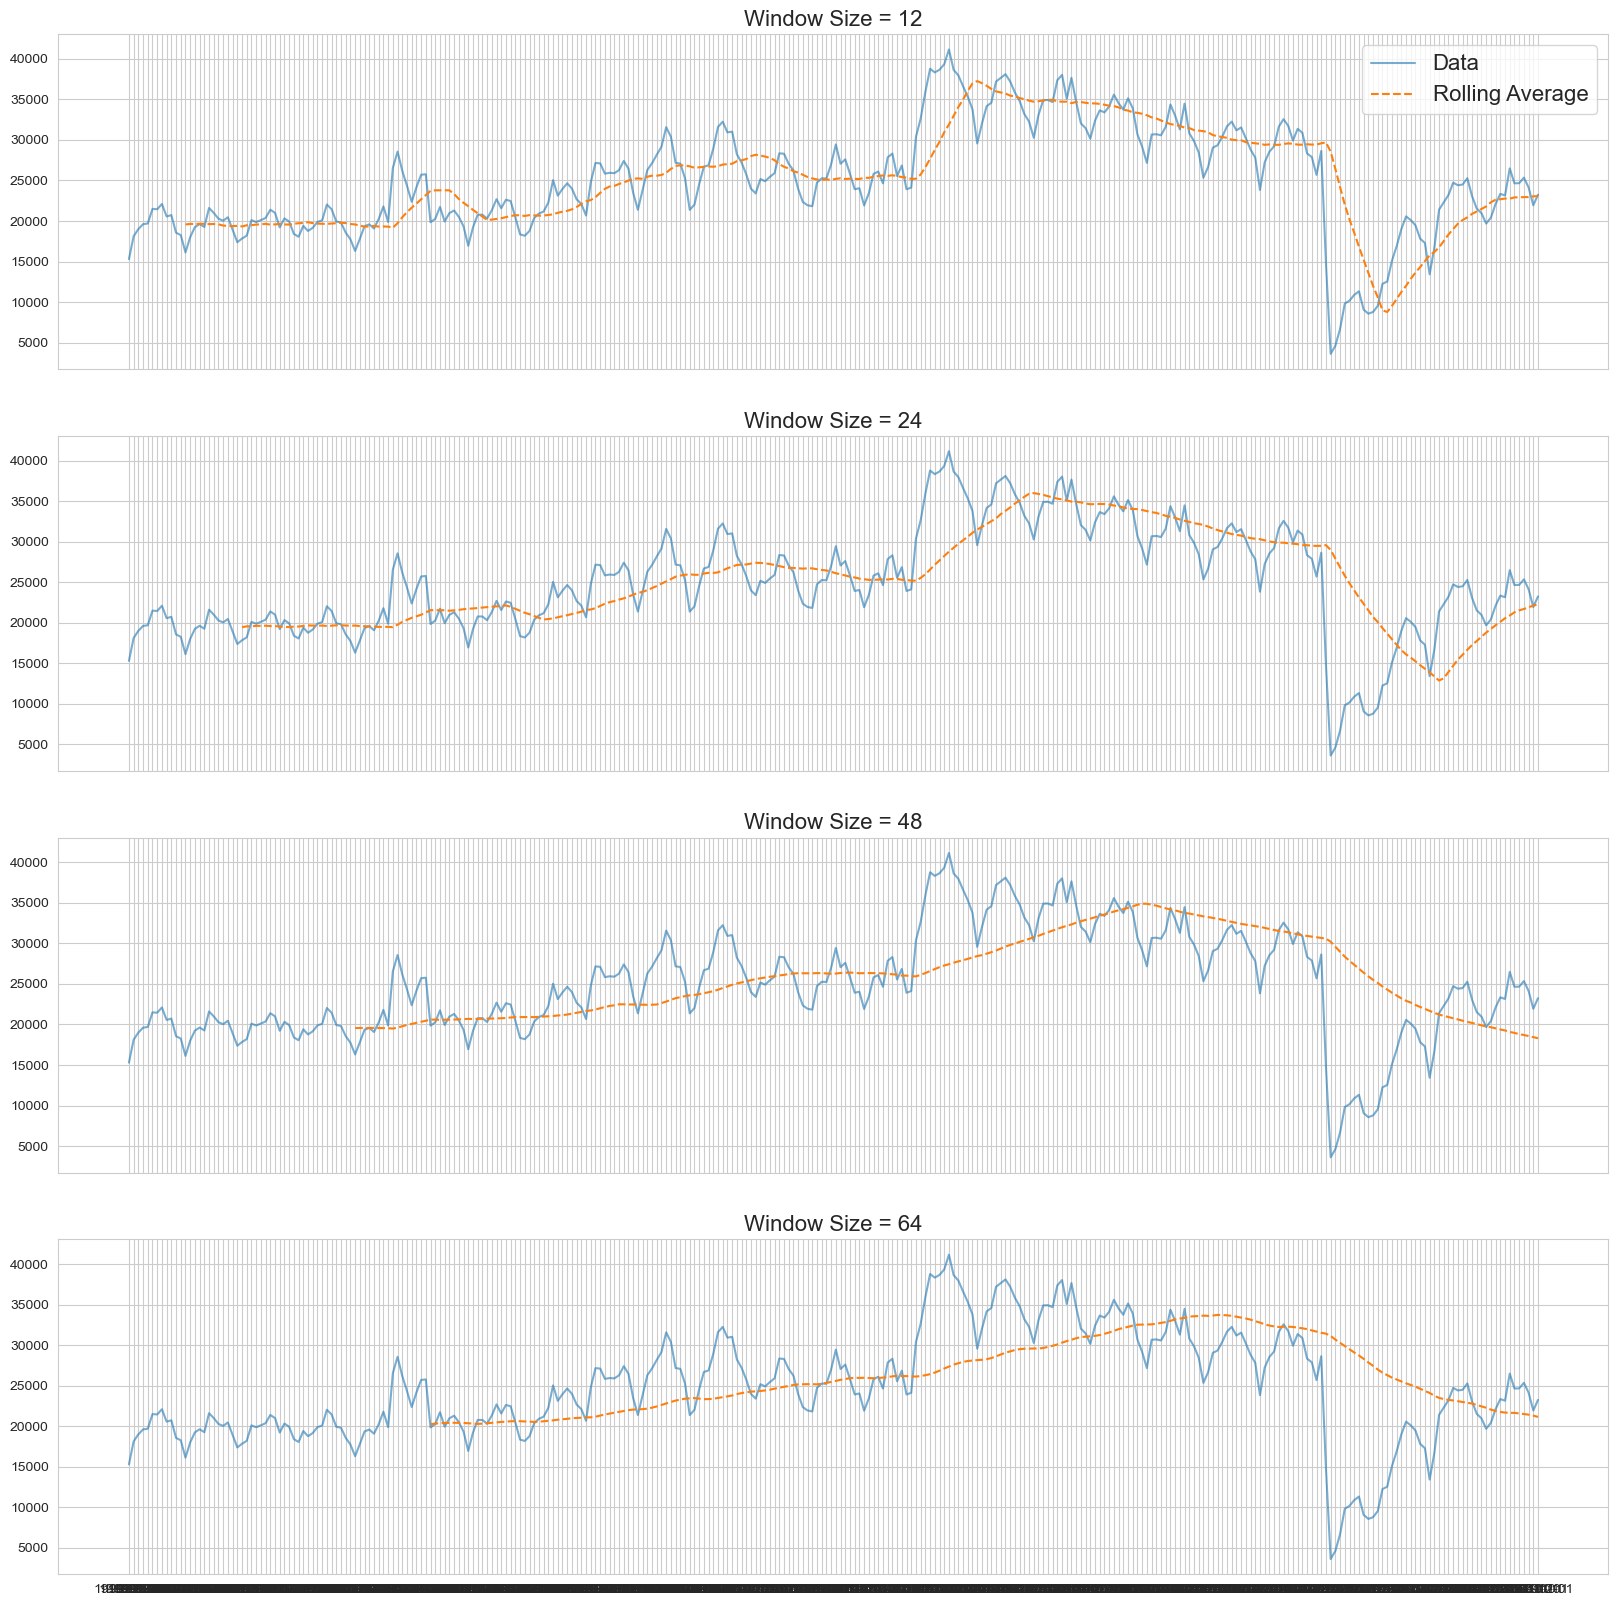

In [40]:
fig,ax = plt.subplots(4, 1, figsize=(20,20), sharex=True, sharey=True)

ax[0].plot(bus_train.DATE, 
           bus_train.Sum,
           alpha=.6,
           label="Data")
ax[0].plot(bus_train.DATE, 
           bus_train.Sum.rolling(12, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")

ax[0].legend(fontsize=16)
ax[0].set_title("Window Size = 12", fontsize=16)

ax[1].plot(bus_train.DATE, 
           bus_train.Sum,
           alpha=.6,
           label="Data")
ax[1].plot(bus_train.DATE, 
           bus_train.Sum.rolling(24, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")
ax[1].set_title("Window Size = 24", fontsize=16)


ax[2].plot(bus_train.DATE, 
           bus_train.Sum,
           alpha=.6,
           label="Data")
ax[2].plot(bus_train.DATE, 
           bus_train.Sum.rolling(48, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")
ax[2].set_title("Window Size = 48", fontsize=16)


ax[3].plot(bus_train.DATE, 
           bus_train.Sum,
           alpha=.6,
           label="Data")
ax[3].plot(bus_train.DATE, 
           bus_train.Sum.rolling(64, closed='left').mean(),
           '--',
           linewidth=1.5,
           label="Rolling Average")
ax[3].set_title("Window Size = 64", fontsize=16)




More general weighted rolling average forecasts

In [44]:
weights = np.array([i/78 for i in range(1,13)])
bus_train_fit =  bus_train.Sum.rolling(12, closed='left').apply(lambda x: np.dot(weights, x), raw=True)

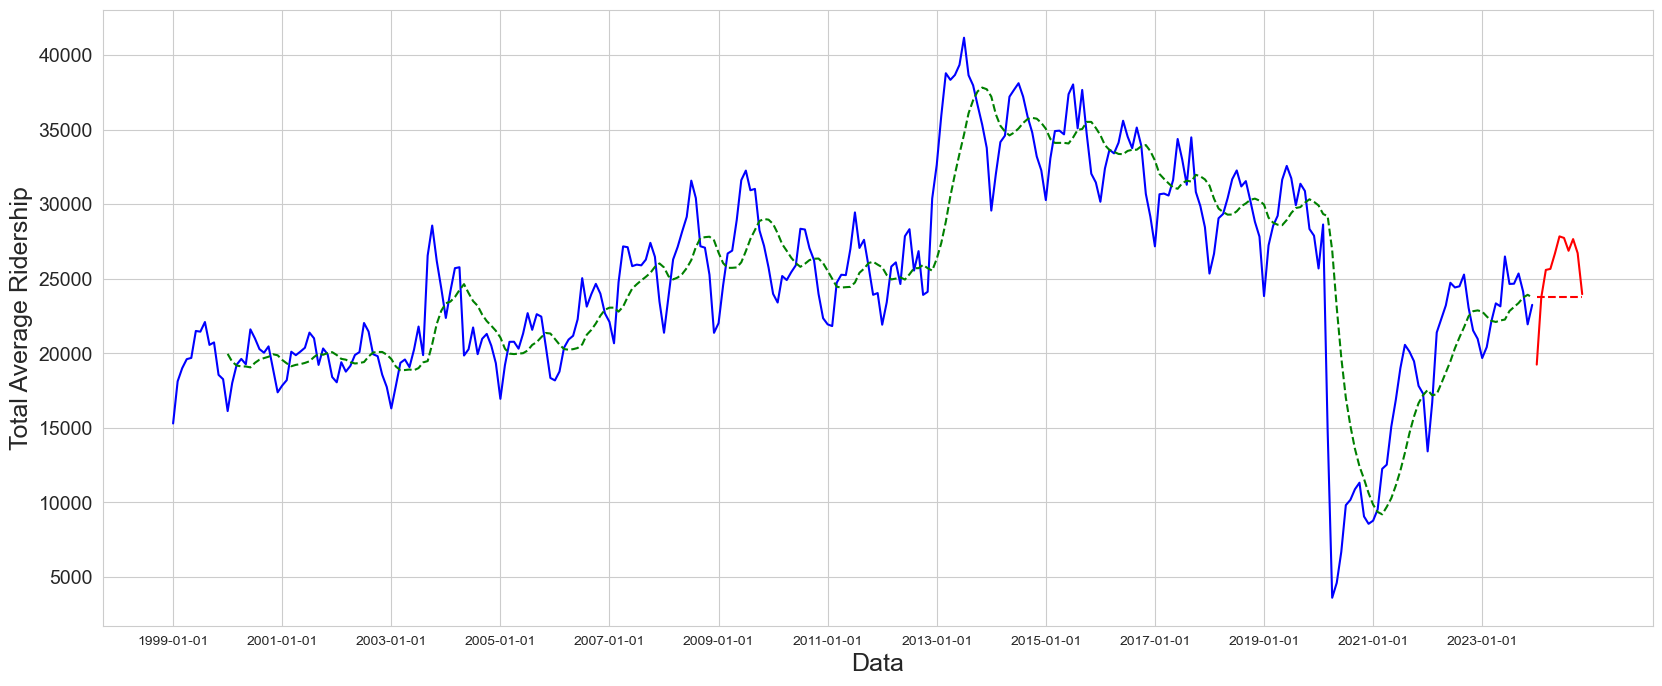

In [46]:
plt.figure(figsize=(20,8))

plt.plot(bus_train.DATE,
         bus_train.Sum,
         'b',
         label = "Training Data")


# plt.plot(bus_train.DATE[-71:],
#          bus_train.Sum[-71:].rolling(12,closed = 'left').mean(),
#          'g--',
#          label = "Training Rolling Average")

plt.plot(bus_train.DATE,
         bus_train_fit,
         'g--',
         label = "Training Weighted Rolling Average")

plt.plot(bus_test.DATE,
         bus_test.Sum[-11:],
         'r',
         label = "Test Data")

plt.plot(bus_test.DATE,
         bus_train_fit.iloc[-1]*np.ones(11),
         'r--',
         label = "Rolling Average Prediction")

plt.xlabel("Date",fontsize=18)
plt.ylabel("Total Average Ridership",fontsize=18)

#plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, len(bus_train), 24)) # Set ticks every 12 units
plt.show()


One question: should we try to implement any of the naive baselines?